In [1]:
from pm4py.objects.log.importer.xes import importer as xes_importer

In [2]:
filepath = "data/"

log = xes_importer.apply(filepath + 'DomesticDeclarations.xes')

HBox(children=(FloatProgress(value=0.0, description='parsing log, completed traces :: ', max=10500.0, style=ProgressStyle(description_width='initial')), HTML(value='')))

### Example "Domestic Declarations" dataset from the BPI Challenge 2020:
* contains events pertaining to two years of travel expense claims
* contains 10,500 cases, 56,437 events
* process flow: 
    * after submission by the employee, the request is sent for approval to the travel administration
    * if approved, the request is then forwarded to the budget owner and after that to the supervisor
    * if the budget owner and supervisor are the same person, then only one of these steps is taken
    * in some cases, the director also needs to approve the request
    * process finished with either the trip taking place or a payment being requested and payed.
* for domestic trips, no prior permission is needed, i.e. an employee can undertake these trips and ask for reimbursement of the costs afterwards
* to get the costs for a travel reimbursed, a claim is filed. This can be done as soon as costs are actually payed (for example for flights or conference registration fees), or within two months after the trip (for example hotel and food costs which are usually payed on the spot)

In [3]:
print("first trace of the log: \n", log[0], "\n")
print("first event of the first trace: \n", log[0][0], "\n")

first trace of the log: 
 {'events': [{'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'org:role': 'EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'org:resource': 'STAFF MEMBER', 'id': 'st_step 86794_0'}, '..', {'concept:name': 'Payment Handled', 'org:role': 'UNDEFINED', 'time:timestamp': datetime.datetime(2017, 1, 12, 17, 31, 22, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'org:resource': 'SYSTEM', 'id': 'dd_declaration 86791_20'}], 'attributes': {'concept:name': 'declaration 86791', 'DeclarationNumber': 'declaration number 86792', 'Amount': 26.85120450862128, 'BudgetNumber': 'budget 86566', 'id': 'declaration 86791'}} 

first event of the first trace: 
 {'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'org:role': 'EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'org:resource': 'STAFF MEMBER', 'id': 'st_step 

In [4]:
type(log)

pm4py.objects.log.log.EventLog

Event Log (objects.log.log.EventLog): 
Represents a sequence of sequences of events. The concept of an event log is the more traditional view on event data, i.e., executions of a process are captured in traces of events.

### Preprocessing Stage:
* extract activity IDs for all events in a trace

In [5]:
log[0][0]["concept:name"]

'Declaration SUBMITTED by EMPLOYEE'

In [6]:
# activities = attributes_filter.get_attribute_values(log, "concept:name")
concept_dict = dict()

for trace in log:
    for event in trace:
        name = event["concept:name"]
        if name in concept_dict:
            concept_dict[name] += 1
        else:
            concept_dict[name] = 1

In [7]:
print(len(concept_dict))

17


In [8]:
print(concept_dict)

{'Declaration SAVED by EMPLOYEE': 135, 'Declaration FINAL_APPROVED by SUPERVISOR': 10131, 'Declaration APPROVED by PRE_APPROVER': 685, 'Declaration REJECTED by PRE_APPROVER': 86, 'Declaration APPROVED by ADMINISTRATION': 8202, 'Declaration REJECTED by ADMINISTRATION': 952, 'Declaration REJECTED by SUPERVISOR': 293, 'Declaration REJECTED by BUDGET OWNER': 59, 'Declaration FOR_APPROVAL by ADMINISTRATION': 1, 'Declaration FOR_APPROVAL by SUPERVISOR': 1, 'Declaration FOR_APPROVAL by PRE_APPROVER': 1, 'Declaration REJECTED by EMPLOYEE': 1365, 'Declaration APPROVED by BUDGET OWNER': 2820, 'Payment Handled': 10044, 'Declaration SUBMITTED by EMPLOYEE': 11531, 'Request Payment': 10040, 'Declaration REJECTED by MISSING': 91}


In [9]:
trace_activities_id = list()

for trace in log:
    event_list = list()
    for event in trace:
        name = event["concept:name"]
        event_list.append(name)
    trace_activities_id.append(event_list)

In [12]:
trace_activities_id[:5]

[['Declaration SUBMITTED by EMPLOYEE',
  'Declaration FINAL_APPROVED by SUPERVISOR',
  'Request Payment',
  'Payment Handled'],
 ['Declaration SUBMITTED by EMPLOYEE',
  'Declaration APPROVED by PRE_APPROVER',
  'Declaration FINAL_APPROVED by SUPERVISOR',
  'Request Payment',
  'Payment Handled'],
 ['Declaration SUBMITTED by EMPLOYEE',
  'Declaration APPROVED by PRE_APPROVER',
  'Declaration FINAL_APPROVED by SUPERVISOR',
  'Request Payment',
  'Payment Handled'],
 ['Declaration SUBMITTED by EMPLOYEE',
  'Declaration FINAL_APPROVED by SUPERVISOR',
  'Request Payment',
  'Payment Handled'],
 ['Declaration SUBMITTED by EMPLOYEE',
  'Declaration FINAL_APPROVED by SUPERVISOR',
  'Request Payment',
  'Payment Handled']]

In [88]:
# convert list of lists to list of sentences
sentences_list = list()

for i in trace_activities_id:
    sentences_list.append(" ".join(i))
    
print(sentences_list[:5])

['Declaration SUBMITTED by EMPLOYEE Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled', 'Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by PRE_APPROVER Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled', 'Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by PRE_APPROVER Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled', 'Declaration SUBMITTED by EMPLOYEE Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled', 'Declaration SUBMITTED by EMPLOYEE Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled']


In [44]:
# map activities to single characters
character_dict = dict()
character_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

if len(concept_dict) < 27:
    for key, char in zip(concept_dict.keys(), character_list):
            character_dict[key] = char
            
print(character_dict)

{'Declaration SAVED by EMPLOYEE': 'A', 'Declaration FINAL_APPROVED by SUPERVISOR': 'B', 'Declaration REJECTED by PRE_APPROVER': 'D', 'Declaration APPROVED by PRE_APPROVER': 'C', 'Declaration APPROVED by ADMINISTRATION': 'E', 'Declaration REJECTED by ADMINISTRATION': 'F', 'Declaration REJECTED by SUPERVISOR': 'G', 'Declaration REJECTED by BUDGET OWNER': 'H', 'Declaration FOR_APPROVAL by ADMINISTRATION': 'I', 'Declaration FOR_APPROVAL by SUPERVISOR': 'J', 'Declaration FOR_APPROVAL by PRE_APPROVER': 'K', 'Declaration REJECTED by EMPLOYEE': 'L', 'Declaration APPROVED by BUDGET OWNER': 'M', 'Payment Handled': 'N', 'Declaration SUBMITTED by EMPLOYEE': 'O', 'Request Payment': 'P', 'Declaration REJECTED by MISSING': 'Q'}


In [49]:
# convert list of all sentences and map it to characters

char_sentences = list()

for trace in trace_activities_id:
    char_sentence = list()
    for activity in trace:
        #print(activity, character_dict[activity])
        char_sentence.append(character_dict[activity])
    char_sentences.append(char_sentence)
    
print(char_sentences)

[['O', 'B', 'P', 'N'], ['O', 'C', 'B', 'P', 'N'], ['O', 'C', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'Q', 'O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'Q', 'O', 'D', 'L', 'O', 'C', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'Q', 'O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['A'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'Q', 'O', 'B', 'P', 'N'], ['O', 'C', 'B', 'P', 'N'], ['O', 'B', 'Q', 'O', 'B', 'P', 'N'], ['O', 'B', 'Q', 'O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'C', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O', 'B', 'P', 'N'], ['O'

In [68]:
markov_char_input = list()

for i in char_sentences:
    markov_char_input.append(" ".join(i))
    
print(markov_char_input)

['O B P N', 'O C B P N', 'O C B P N', 'O B P N', 'O B P N', 'O B P N', 'O B Q O B P N', 'O B P N', 'O B P N', 'O B Q O D L O C B P N', 'O B P N', 'O B P N', 'O B P N', 'O B Q O B P N', 'O B P N', 'A', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B Q O B P N', 'O C B P N', 'O B Q O B P N', 'O B Q O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O C B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O G L O B P N', 'A', 'O D L O C B P N', 'O C B P N', 'O D L O C B Q O C B P N', 'O C B Q O C B P N', 'O C B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'A', 'O B P N', 'O B P N', 'O C B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O C B P N', 'O C B P N', 'O B P N', 'O B P N', 'O G L O B P N', 'O B Q O G L O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O B P N', 'O D L O C B P N', 'O B P N', 'O C B P N', 'O B P N', 'O B P 

In [111]:
# map activities to integers
int_dict = dict()
i = 1

for key in concept_dict.keys():
    int_dict[key] = i
    i += 1
           
print(int_dict)

{'Declaration SAVED by EMPLOYEE': 1, 'Declaration FINAL_APPROVED by SUPERVISOR': 2, 'Declaration REJECTED by PRE_APPROVER': 4, 'Declaration APPROVED by PRE_APPROVER': 3, 'Declaration APPROVED by ADMINISTRATION': 5, 'Declaration REJECTED by ADMINISTRATION': 6, 'Declaration REJECTED by SUPERVISOR': 7, 'Declaration REJECTED by BUDGET OWNER': 8, 'Declaration FOR_APPROVAL by ADMINISTRATION': 9, 'Declaration FOR_APPROVAL by SUPERVISOR': 10, 'Declaration FOR_APPROVAL by PRE_APPROVER': 11, 'Declaration REJECTED by EMPLOYEE': 12, 'Declaration APPROVED by BUDGET OWNER': 13, 'Payment Handled': 14, 'Declaration SUBMITTED by EMPLOYEE': 15, 'Request Payment': 16, 'Declaration REJECTED by MISSING': 17}


In [115]:
# convert list of all sentences and map it to integers

int_sentences = list()

for trace in trace_activities_id:
    int_sentence = list()
    for activity in trace:
        #print(activity, int_dict[activity])
        int_sentence.append(int_dict[activity])
    int_sentences.append(int_sentence)
    
print(int_sentences)

[[15, 2, 16, 14], [15, 3, 2, 16, 14], [15, 3, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 17, 15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 17, 15, 4, 12, 15, 3, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 17, 15, 2, 16, 14], [15, 2, 16, 14], [1], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 17, 15, 2, 16, 14], [15, 3, 2, 16, 14], [15, 2, 17, 15, 2, 16, 14], [15, 2, 17, 15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 3, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 2, 16, 14], [15, 7, 12, 15, 2, 16, 14], [1], [15, 4, 12, 15, 3, 2, 16, 14], [15, 3, 2, 16, 14], [15, 4, 12, 15, 3, 2, 17, 15, 3, 2, 16, 14], [15, 3, 2, 17, 15, 3, 2, 

In [125]:
markov_int_input = list()

for i in int_sentences:
    markov_int_input.append(" ".join(map(str,i)))
    
print(markov_int_input)

['15 2 16 14', '15 3 2 16 14', '15 3 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 17 15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 17 15 4 12 15 3 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 17 15 2 16 14', '15 2 16 14', '1', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 17 15 2 16 14', '15 3 2 16 14', '15 2 17 15 2 16 14', '15 2 17 15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 3 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 7 12 15 2 16 14', '1', '15 4 12 15 3 2 16 14', '15 3 2 16 14', '15 4 12 15 3 2 17 15 3 2 16 14', '15 3 2 17 15 3 2 16 14', '15 3 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '1', '15 2 16 14', '15 2 16 14', '15 3 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 2 16 14', '15 3 2 

### Clustering Stage
* input:
    * list of trace activities id
    * number of clusters
* Steps:
    1. randomly assign to initial clusters
    2. calculate markov chains for each cluster
    3. assign sequences to best cluster and repeat steps 2. and 3. until algorithm converges

In [94]:
# 1. randomly assign to intial clusters
import numpy as np

n_clusters = 3

cluster_initial_state = np.array_split(sentences_list, n_clusters)
for cluster in cluster_initial_state:
    print(len(cluster))
    print(cluster)

3500
['Declaration SUBMITTED by EMPLOYEE Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled'
 'Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by PRE_APPROVER Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled'
 'Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by PRE_APPROVER Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled'
 ...
 'Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by ADMINISTRATION Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled'
 'Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by ADMINISTRATION Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled'
 'Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by ADMINISTRATION Declaration APPROVED by BUDGET OWNER Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled']
3500
['Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by ADMINISTRATION Declaration FINAL_APP

In [ ]:
# 2. calculate Markov chains for each cluster


#### Markov Chains

Pr( Xn+1 = x | X1 = x1, X2 = x2, …, Xn = xn) = Pr( Xn+1 = x | Xn = xn)

Pr(Xn+1 = x | Xn = xn) --> probability of going to state Xn+1 given value of state Xn

--> Activity IDs represent the various possible states of the Markov Chains

##### Tutorials:
* https://www.upgrad.com/blog/markov-chain-in-python-tutorial/

In [79]:
# not bad
import markovify

text = sentences_list

text_model = markovify.NewlineText(text)
model_json = text_model.to_json()

for i in range(5):
    print(text_model.make_sentence())

Declaration SUBMITTED by EMPLOYEE Declaration REJECTED by BUDGET OWNER Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled
Declaration SUBMITTED by EMPLOYEE Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by BUDGET OWNER Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled
Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by BUDGET OWNER Declaration REJECTED by EMPLOYEE Declaration APPROVED by ADMINISTRATION Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled
Declaration SUBMITTED by EMPLOYEE Declaration APPROVED by ADMINISTRATION Declaration REJECTED by EMPLOYEE Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled
Declaration SUBMITTED by EMPLOYEE Declaration REJECTED by EMPLOYEE Declaration APPROVED by BUDGET OWNER Declaration FINAL_APPROVED by SUPERVISOR Request Payment Payment Handled


In [82]:
model_json

'{"state_size": 2, "chain": "[[[\\"Declaration\\", \\"APPROVED\\"], {\\"by\\": 11707}], [[\\"Payment\\", \\"Payment\\"], {\\"Handled\\": 10037}], [[\\"by\\", \\"EMPLOYEE\\"], {\\"Declaration\\": 12612, \\"Request\\": 1, \\"___END__\\": 418}], [[\\"Payment\\", \\"Handled\\"], {\\"Declaration\\": 1, \\"___END__\\": 10043}], [[\\"SUPERVISOR\\", \\"Declaration\\"], {\\"REJECTED\\": 373, \\"SUBMITTED\\": 2}], [[\\"PRE_APPROVER\\", \\"Declaration\\"], {\\"FINAL_APPROVED\\": 674, \\"SUBMITTED\\": 1, \\"REJECTED\\": 97}], [[\\"APPROVED\\", \\"by\\"], {\\"BUDGET\\": 2820, \\"PRE_APPROVER\\": 685, \\"ADMINISTRATION\\": 8202}], [[\\"FOR_APPROVAL\\", \\"by\\"], {\\"PRE_APPROVER\\": 1, \\"SUPERVISOR\\": 1, \\"ADMINISTRATION\\": 1}], [[\\"SUPERVISOR\\", \\"Request\\"], {\\"Payment\\": 10039}], [[\\"by\\", \\"MISSING\\"], {\\"Declaration\\": 61, \\"___END__\\": 30}], [[\\"EMPLOYEE\\", \\"Request\\"], {\\"Payment\\": 1}], [[\\"OWNER\\", \\"Declaration\\"], {\\"FINAL_APPROVED\\": 2788, \\"SUBMITTED\\":

In [86]:
chars = markov_char_input

char_model = markovify.NewlineText(chars)
char_model_json = char_model.to_json()

for i in range(10):
    print(char_model.make_sentence())

None
None
None
None
None
None
O F L O C B P N
None
None
None


In [87]:
char_model_json

'{"state_size": 2, "chain": "[[[\\"N\\", \\"L\\"], {\\"___END__\\": 1}], [[\\"Q\\", \\"O\\"], {\\"G\\": 1, \\"F\\": 1, \\"C\\": 11, \\"E\\": 2, \\"B\\": 45, \\"D\\": 1}], [[\\"H\\", \\"O\\"], {\\"I\\": 1}], [[\\"C\\", \\"B\\"], {\\"Q\\": 15, \\"P\\": 659}], [[\\"G\\", \\"O\\"], {\\"L\\": 1, \\"E\\": 1}], [[\\"M\\", \\"G\\"], {\\"L\\": 31, \\"___END__\\": 1}], [[\\"O\\", \\"F\\"], {\\"L\\": 928, \\"___END__\\": 5, \\"O\\": 19}], [[\\"J\\", \\"Q\\"], {\\"___END__\\": 1}], [[\\"L\\", \\"O\\"], {\\"G\\": 7, \\"F\\": 106, \\"C\\": 77, \\"E\\": 857, \\"B\\": 29, \\"D\\": 5}], [[\\"O\\", \\"B\\"], {\\"Q\\": 71, \\"P\\": 1465}], [[\\"O\\", \\"L\\"], {\\"___END__\\": 1, \\"O\\": 6}], [[\\"B\\", \\"Q\\"], {\\"___END__\\": 25, \\"O\\": 61}], [[\\"F\\", \\"L\\"], {\\"___END__\\": 196, \\"O\\": 732}], [[\\"M\\", \\"B\\"], {\\"N\\": 2, \\"P\\": 2786}], [[\\"O\\", \\"C\\"], {\\"G\\": 11, \\"B\\": 674}], [[\\"F\\", \\"O\\"], {\\"E\\": 2, \\"L\\": 5, \\"F\\": 12}], [[\\"K\\", \\"Q\\"], {\\"___END__\\":

In [76]:
# not so good
from markovchain.text import MarkovText

markov = MarkovText()

for i in sentences_list:
    markov.data(i)
    
print(markov())

Declaration submitted by pre_approver declaration final_approved by supervisor request payment handled.


In [161]:
# hmmlearn --> https://hmmlearn.readthedocs.io/en/latest/tutorial.html
from hmmlearn import hmm

remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)

# working with multiple sequences
X = np.concatenate(int_sentences)
lengths = [len(l) for l in int_sentences]
#remodel.fit(np.reshape(int_sentences[0],(-1,1)))
remodel.fit(np.reshape(X, (-1,1)), lengths)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=3, n_iter=100, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [140]:
remodel.monitor_

ConvergenceMonitor(
    history=[-103749.6826291729, -103749.6797132906],
    iter=33,
    n_iter=100,
    tol=0.01,
    verbose=False,
)

In [164]:
# find log-likelihood of Gaussian HMM
logProb = remodel.score(np.reshape(X,(-1,1)), lengths)
print(logProb)
 
# generate nSamples from Gaussian HMM
samples = remodel.sample(10)
print(samples)

-103749.67889332458
(array([[14.58520971],
       [ 4.07783025],
       [17.13497391],
       [14.06637372],
       [ 4.89797989],
       [ 2.28584667],
       [16.52330892],
       [16.70391401],
       [ 3.90670726],
       [ 7.41695853]]), array([1, 0, 2, 1, 0, 0, 2, 1, 0, 0]))


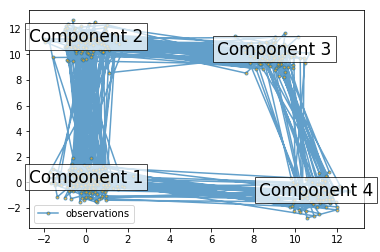

In [109]:
import matplotlib.pyplot as plt

##############################################################
# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
###############################################################

# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()